In [70]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LinearRegression

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [71]:

df = pd.read_csv("./artifacts/temp_c_remainder.csv", parse_dates=True, index_col="DATE")
df = df.dropna()
df = df.rename(columns={ 'resid': 'remainder'})
df.head()

,remainder
DATE,
1946-07-02,4.842046
1946-07-03,5.947580
1946-07-04,8.553276
1946-07-05,7.875453
1946-07-06,1.162432


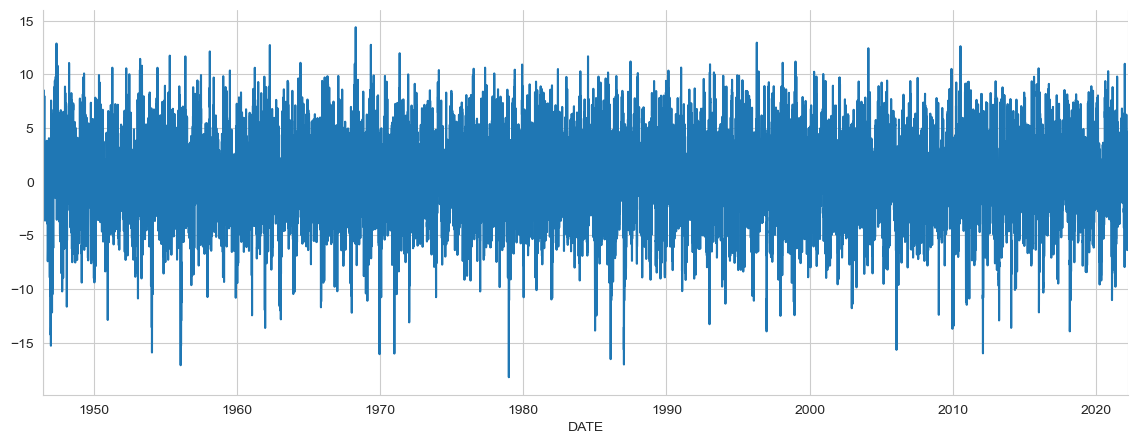

In [72]:
df['remainder'].plot(figsize=(14,5))
sns.despine()

(-0.1, 0.1)

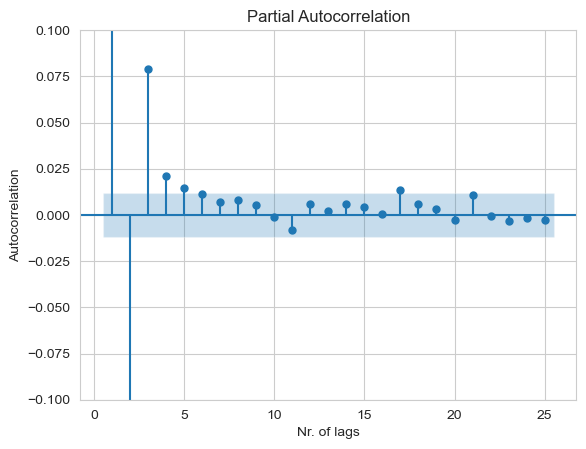

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df['remainder'].dropna(),zero=False,lags=25)
plt.xlabel('Nr. of lags')
plt.ylabel('Autocorrelation')
plt.ylim(-0.1, 0.1)

## Create a model to predict the current temperature based on the lag temperatures

#### Add lag columns

In [84]:
# maximum interval to consider
p = 4
lags = [i+1 for i in range(p)]

for lag in lags:
    column_name = 'lag' + str(lag)
    df[column_name] = df['remainder'].shift(lag)

df.head()
df = df.dropna()

In [85]:
lag_columns = df.columns[-p:]

# model for remainder
X_remainder = df[[lag_columns[0]]]
y_remainder = df['remainder']

ar_model = LinearRegression()
ar_model.fit(X_remainder, y_remainder)
df['ar_predictions'] = ar_model.predict(X_remainder)



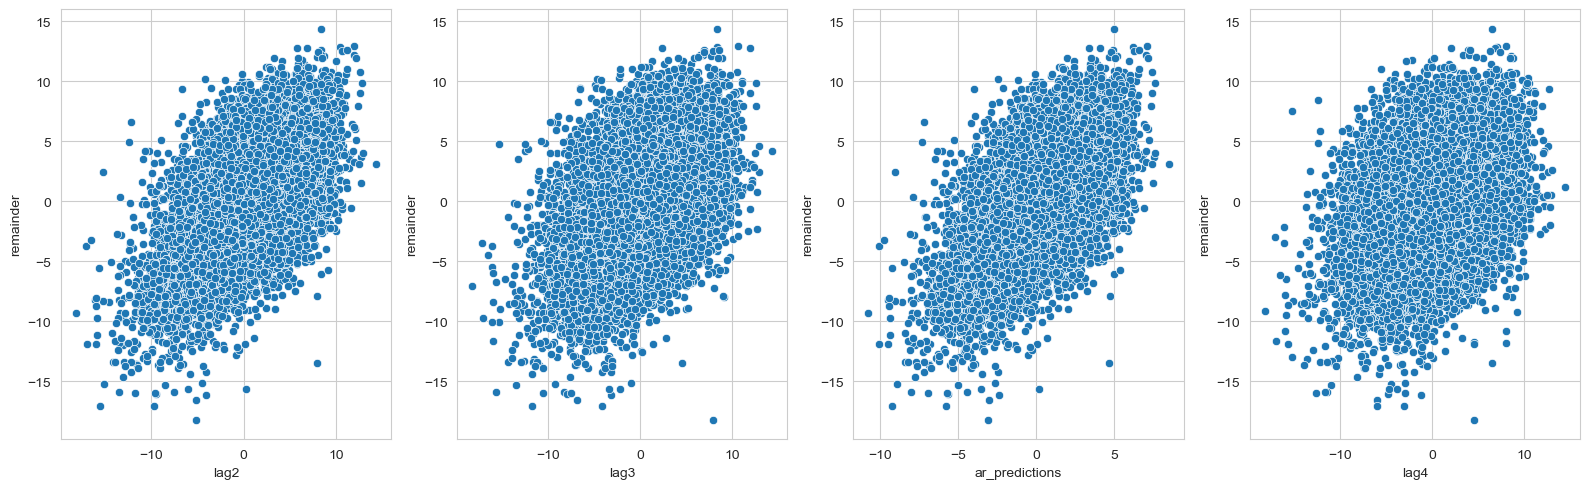

In [86]:
import matplotlib.gridspec as gridspec

fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(x=df[lag_columns[i]],y=df['remainder'],ax=axes[i])
    
plt.tight_layout()

<AxesSubplot:>

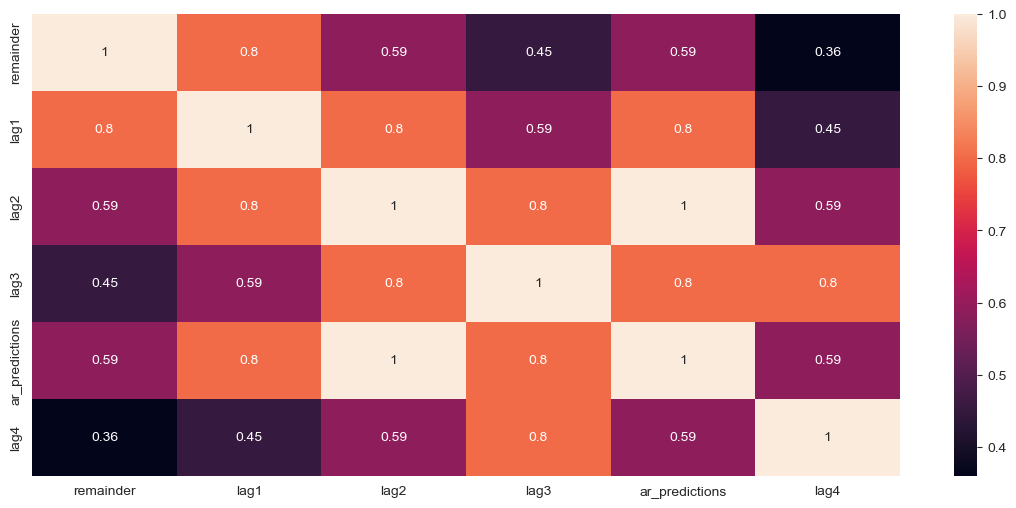

In [87]:
plt.rcParams['figure.figsize'] = (14,6)
sns.heatmap(round(df.corr(),2), annot=True)

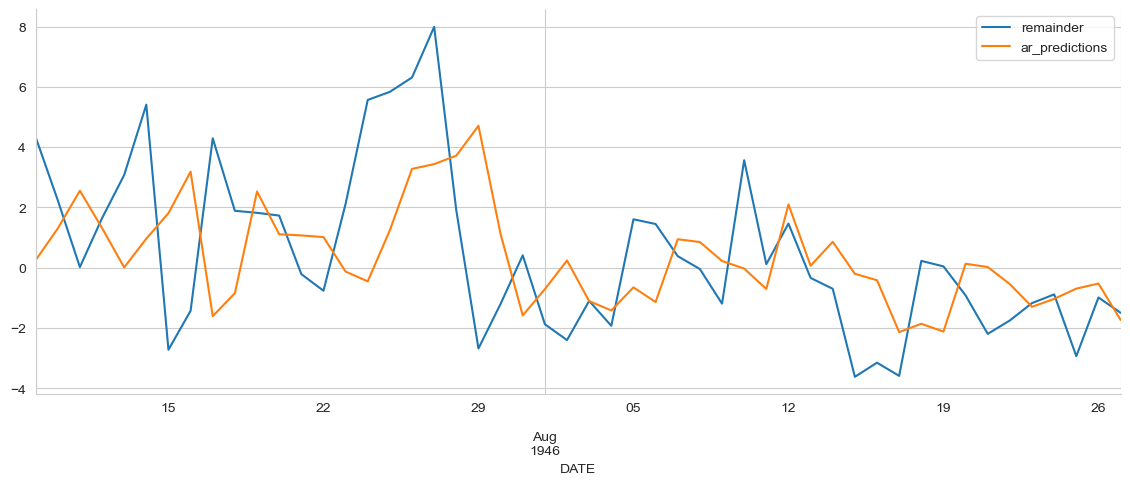

In [88]:
df[['remainder','ar_predictions']][:50].plot(figsize=(14,5),legend=True)
sns.despine()